In [63]:
import nltk
from bs4 import BeautifulSoup
import urllib.request
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
import string
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

from sklearn.feature_extraction.text import CountVectorizer

print("Reading Text and Tokenizing...")
response = urllib.request.urlopen('https://www.gutenberg.org/files/74/74-h/74-h.htm')
#response2 = urllib.request.urlopen('https://www.gutenberg.org/files/32325/32325-h/32325-h.htm')
html = response.read()
#html = response2.read()

Reading Text and Tokenizing...


In [9]:
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [23]:
soup = BeautifulSoup(html,"html5lib")
text = soup.get_text(strip=True)
print(text)

The Project Gutenberg eBook of The Adventures of Tom Sawyer, By Mark Twainbody { margin-left: 20%; margin-right: 20%; background:#faebd0; text-align:justify}
    p { text-indent: 1em; margin-top: .25em; margin-bottom: .25em; }
    H1,H2,H3,H4,H5,H6 { text-align: center; margin-left: 15%; margin-right: 15%; }
    hr  { width: 50%; text-align: center;}
    blockquote {font-size: 97%; font-style: italic; margin-left: 10%; margin-right: 10%;}
    div.fig    { display:block; margin:0 auto; text-align:center; }

.ph2, .ph3, .ph4 { text-align: center; text-indent: 0em; font-weight: bold; }
.ph2 { font-size: x-large; margin: .75em auto; }
.ph3 { font-size: large; margin: .83em auto; }
.ph4 { font-size: medium; margin: 1.12em auto; }
div.chapter {page-break-before: always;}
h2 {page-break-before: avoid;}The Project Gutenberg eBook of The Adventures of Tom Sawyer, by Mark TwainThis eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with 

In [25]:
tokens = [t for t in text.split()]
print("Removing Punctuation...")
tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(text)
tokens = [t.lower() for t in tokens]
print(tokens)

Removing Punctuation...
['the', 'project', 'gutenberg', 'ebook', 'of', 'the', 'adventures', 'of', 'tom', 'sawyer', 'by', 'mark', 'twainbody', 'margin', 'left', '20', 'margin', 'right', '20', 'background', 'faebd0', 'text', 'align', 'justify', 'p', 'text', 'indent', '1em', 'margin', 'top', '25em', 'margin', 'bottom', '25em', 'h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'text', 'align', 'center', 'margin', 'left', '15', 'margin', 'right', '15', 'hr', 'width', '50', 'text', 'align', 'center', 'blockquote', 'font', 'size', '97', 'font', 'style', 'italic', 'margin', 'left', '10', 'margin', 'right', '10', 'div', 'fig', 'display', 'block', 'margin', '0', 'auto', 'text', 'align', 'center', 'ph2', 'ph3', 'ph4', 'text', 'align', 'center', 'text', 'indent', '0em', 'font', 'weight', 'bold', 'ph2', 'font', 'size', 'x', 'large', 'margin', '75em', 'auto', 'ph3', 'font', 'size', 'large', 'margin', '83em', 'auto', 'ph4', 'font', 'size', 'medium', 'margin', '1', '12em', 'auto', 'div', 'chapter', 'page', 'break',

In [26]:
print("Removing Stop Words...")
clean_tokens = tokens[:]
sr = stopwords.words('english')
for token in tokens:
	if token in stopwords.words('english'):
		clean_tokens.remove(token)
print(clean_tokens)

Removing Stop Words...
['project', 'gutenberg', 'ebook', 'adventures', 'tom', 'sawyer', 'mark', 'twainbody', 'margin', 'left', '20', 'margin', 'right', '20', 'background', 'faebd0', 'text', 'align', 'justify', 'p', 'text', 'indent', '1em', 'margin', 'top', '25em', 'margin', 'bottom', '25em', 'h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'text', 'align', 'center', 'margin', 'left', '15', 'margin', 'right', '15', 'hr', 'width', '50', 'text', 'align', 'center', 'blockquote', 'font', 'size', '97', 'font', 'style', 'italic', 'margin', 'left', '10', 'margin', 'right', '10', 'div', 'fig', 'display', 'block', 'margin', '0', 'auto', 'text', 'align', 'center', 'ph2', 'ph3', 'ph4', 'text', 'align', 'center', 'text', 'indent', '0em', 'font', 'weight', 'bold', 'ph2', 'font', 'size', 'x', 'large', 'margin', '75em', 'auto', 'ph3', 'font', 'size', 'large', 'margin', '83em', 'auto', 'ph4', 'font', 'size', 'medium', 'margin', '1', '12em', 'auto', 'div', 'chapter', 'page', 'break', 'always', 'h2', 'page', 'break',

Streaming output truncated to the last 5000 lines.
loud:2
enough:61
furnitur:2
hear:43
lay:51
get:141
hold:23
finish:14
time:213
bend:6
punch:3
bed:28
broom:1
need:8
breath:29
punctuat:2
resurrect:3
noth:54
see:144
beat:7
went:115
open:33
door:49
stood:53
tomato:1
vine:4
jimpson:1
weed:6
constitut:1
garden:3
lift:18
voic:37
angl:2
calcul:5
distanc:19
shout:20
slight:2
nois:8
behind:31
seiz:14
slack:1
roundabout:4
arrest:1
flight:2
might:64
closet:6
hand:111
mouth:19
whatisthat:1
truck:1
know:146
jam:4
let:95
alon:18
skin:7
switch:3
hover:2
air:30
peril:3
desper:5
whirl:2
round:19
snatch:14
skirt:2
danger:13
lad:23
fled:4
instant:17
scrambl:1
high:24
fenc:25
disappear:11
broke:22
gentl:3
laugh:13
hang:17
anyth:57
trick:6
like:137
fool:23
biggest:2
dog:19
alik:5
bodi:37
pear:2
long:116
torment:7
dander:1
make:85
minut:37
hit:10
lick:17
lord:16
truth:9
spare:4
rod:2
spile:3
child:17
sin:5
suffer:31
us:52
full:37
scratch:6
sister:1
lash:3
somehow:8
everi:79
hurt:11
man:60
born:3
woman:3
sc

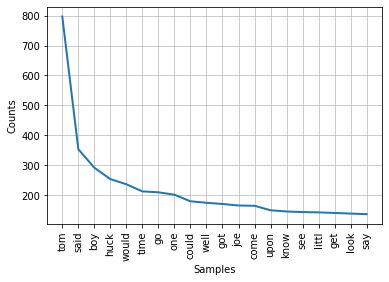

In [27]:
print("Stemming...")
stemmer = PorterStemmer()
stemmed_tokens = [stemmer.stem(token) for token in clean_tokens]
print("Frequency Analysis...")
freq = nltk.FreqDist(stemmed_tokens)
for key,val in freq.items():
	print (str(key) + ':' + str(val))
print("Length of Unique Items:", len(freq.items()))
freq.plot(20, cumulative=False)

Streaming output truncated to the last 5000 lines.
servic:7
could:180
seen:27
stove:2
lid:2
well:175
perplex:7
moment:73
said:354
fierc:2
still:78
loud:2
enough:61
furnitur:2
hear:43
lay:51
get:141
hold:23
finish:14
time:213
bend:6
punch:3
bed:28
broom:1
need:8
breath:29
punctuat:2
resurrect:3
noth:54
see:144
beat:7
went:115
open:33
door:49
stood:53
tomato:1
vine:4
jimpson:1
weed:6
constitut:1
garden:3
lift:18
voic:37
angl:2
calcul:5
distanc:19
shout:20
slight:2
nois:8
behind:31
seiz:14
slack:1
roundabout:4
arrest:1
flight:2
might:64
closet:6
hand:111
mouth:19
whatisthat:1
truck:1
know:146
jam:4
let:95
alon:18
skin:7
switch:3
hover:2
air:30
peril:3
desper:5
whirl:2
round:19
snatch:14
skirt:2
danger:13
lad:23
fled:4
instant:17
scrambl:1
high:24
fenc:25
disappear:11
broke:22
gentl:3
laugh:13
hang:17
anyth:57
trick:6
like:137
fool:23
biggest:2
dog:19
alik:5
bodi:37
pear:2
long:116
torment:7
dander:1
make:85
minut:37
hit:10
lick:17
lord:16
truth:9
spare:4
rod:2
spile:3
sin:5
suffer:31
full

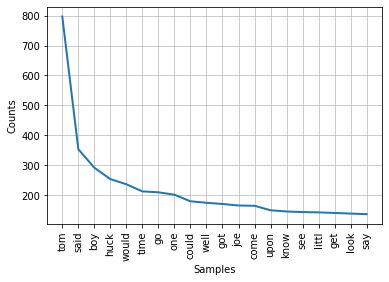

In [53]:
print("Lemmatizing...")

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in stemmed_tokens]
print("Frequency Analysis...")
freq = nltk.FreqDist(lemmatized_tokens)

for key,val in freq.items():
	print (str(key) + ':' + str(val))
print("Length of Unique Items:", len(freq.items()))
freq.plot(20, cumulative=False)

Streaming output truncated to the last 5000 lines.
loud:2
enough:61
furnitur:2
hear:43
lay:51
get:141
hold:23
finish:14
time:213
bend:6
punch:3
bed:28
broom:1
need:8
breath:29
punctuat:2
resurrect:3
noth:54
see:144
beat:7
went:115
open:33
door:49
stood:53
tomato:1
vine:4
jimpson:1
weed:6
constitut:1
garden:3
lift:18
voic:37
angl:2
calcul:5
distanc:19
shout:20
slight:2
nois:8
behind:31
seiz:14
slack:1
roundabout:4
arrest:1
flight:2
might:64
closet:6
hand:111
mouth:19
whatisthat:1
truck:1
know:146
jam:4
let:95
alon:18
skin:7
switch:3
hover:2
air:30
peril:3
desper:5
whirl:2
round:19
snatch:14
skirt:2
danger:13
lad:23
fled:4
instant:17
scrambl:1
high:24
fenc:25
disappear:11
broke:22
gentl:3
laugh:13
hang:17
anyth:57
trick:6
like:137
fool:23
biggest:2
dog:19
alik:5
bodi:37
pear:2
long:116
torment:7
dander:1
make:85
minut:37
hit:10
lick:17
lord:16
truth:9
spare:4
rod:2
spile:3
child:17
sin:5
suffer:31
us:52
full:37
scratch:6
sister:1
lash:3
somehow:8
everi:79
hurt:11
man:60
born:3
woman:3
sc

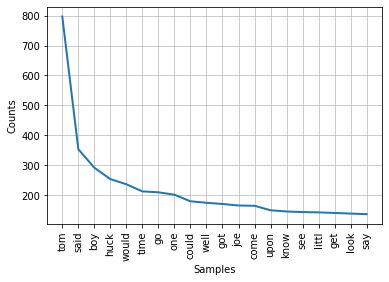

In [71]:
print("Frequency Analysis...")
freq = nltk.FreqDist(stemmed_tokens)
for key,val in freq.items():
	print (str(key) + ':' + str(val))
print("Length of Unique Items:", len(freq.items()))
freq.plot(20, cumulative=False)

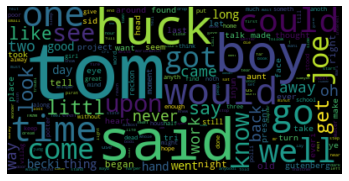

In [86]:
wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=freq)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()